# **Kelompok 3 C2**
1. 2101310 AKMAL ZULKIFLI
2. 2205297 NABILLA ASSYFA RAMADHANI
3. 2205410 RADITYA ADHA RAHMAN
4. 2106330 WILDAN MAULI DAROJAT
5. 2201017 ILHAM AKBAR

Klasifikasi gambar berdasarkan jenis kelamin (perempuan atau laki-laki)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


# **Download dataset**


In [2]:
# download file dataset dari Repositories github ke file Dataset_Gambar.zip
!wget --no-check-certificate \
  https://github.com/radityadhaaa/TUGAS-KLASIFIKASI-IMAGE-KELOMPOK-3/raw/main/Dataset%20Gambar%20Datamining%20-%20Kelompok%203.zip \
  -O /tmp/Dataset_Gambar.zip


--2023-11-26 15:46:00--  https://github.com/radityadhaaa/TUGAS-KLASIFIKASI-IMAGE-KELOMPOK-3/raw/main/Dataset%20Gambar%20Datamining%20-%20Kelompok%203.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/radityadhaaa/TUGAS-KLASIFIKASI-IMAGE-KELOMPOK-3/main/Dataset%20Gambar%20Datamining%20-%20Kelompok%203.zip [following]
--2023-11-26 15:46:00--  https://raw.githubusercontent.com/radityadhaaa/TUGAS-KLASIFIKASI-IMAGE-KELOMPOK-3/main/Dataset%20Gambar%20Datamining%20-%20Kelompok%203.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52653409 (50M) [application/zip]
Saving to: ‘/tmp/Dataset_Gambar.zip’

# **Mengubah file zip ke folder**


In [3]:
# Impor pustaka-pustaka untuk manipulasi file dan gambar
import zipfile, os
import os
# Definisikan path lokal ke file zip yang akan diekstrak
local_zip = '/tmp/Dataset_Gambar.zip'

# Buka file zip dengan mode baca ('r')
zip_ref = zipfile.ZipFile(local_zip, 'r')

# Ekstrak seluruh isi file zip ke folder '/content'
zip_ref.extractall('/content')

# Tutup file zip setelah selesai diekstrak
zip_ref.close()

# **Menyimpan path dataset**

In [4]:
import pathlib
# menyimpanan parh datset gambar ke data_dir untuk memudahkan pencarian
data_dir = pathlib.Path("/content/Dataset Gambar Datamining - Kelompok 3")

# **Melihat Jumlah file image yang ada di dataset**

In [5]:
# Melihat jumlah file dengan format jpeg di dataset
image_count = len(list(data_dir.glob('*/*.jpeg')))
# Menampilkan
print(image_count)


552


# **Melihat jumlah file dari tiap class yang ada di dataset**

In [6]:
# untuk mencari class apa saja yang ada di dataset dan di simpan di list_dir
list_dir = [os.path.basename(x) for x in data_dir.iterdir() if x.is_dir()]
# menampilkan data verapa jumlah class yang ada
print("Jumlah class: {} ".format(len(list_dir)))
print("Jumlah instance per class")
# untuk menampilkan jumlah file masing- masing kelas
for x in list_dir:
  # untuk menampilkan hasil dari jumlah file
  print("{} = {} ".format(x,len(list(data_dir.glob('{}/*.jpeg'.format(x))))))



Jumlah class: 2 
Jumlah instance per class
laki - laki = 304 
perempuan = 248 


# **Menampilkan image dari class laki - laki**

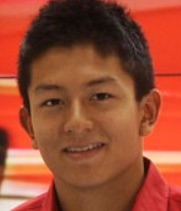

In [7]:
# mengambil data dari class laki - laki
laki_laki = list(data_dir.glob('laki - laki/*'))
# menampilkan data tersebut menjadi foto
PIL.Image.open(str(laki_laki[1]))

# **Menampilkan image dari class perempuan**

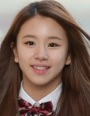

In [8]:
# mengambil data dari class perempuan
perempuan = list(data_dir.glob('perempuan/*'))
# menampilkan data tersebut menjadi foto
PIL.Image.open(str(perempuan[1]))

# **Inisialisasi untuk panjang dan lebar image**

In [9]:
batch_size = 32
img_height = 180
img_width = 180

# **Pemisahan data Train dengan konfigurasi 80%**

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  #Folder target untuk digenerasi
  data_dir,
  # jumlah data yang di split
  validation_split=0.2,
  #Untuk data training
  subset="training",
  seed=123,
  # ukuran file image
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 552 files belonging to 2 classes.
Using 442 files for training.


# **Pemisahan data Validasi dengan konfigurasi 20%**

In [11]:

val_ds = tf.keras.utils.image_dataset_from_directory(
  #Folder target untuk digenerasi
  data_dir,
  # jumlah data yang di split
  validation_split=0.2,
  # Untuk data validasi
  subset="validation",
  seed=123,
  # ukuran file image
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 552 files belonging to 2 classes.
Using 110 files for validation.


# **Penyimpan nama class di training**

In [12]:
class_names = train_ds.class_names
print(class_names)

['laki - laki', 'perempuan']


# **Menampilkan image dari tiap class**

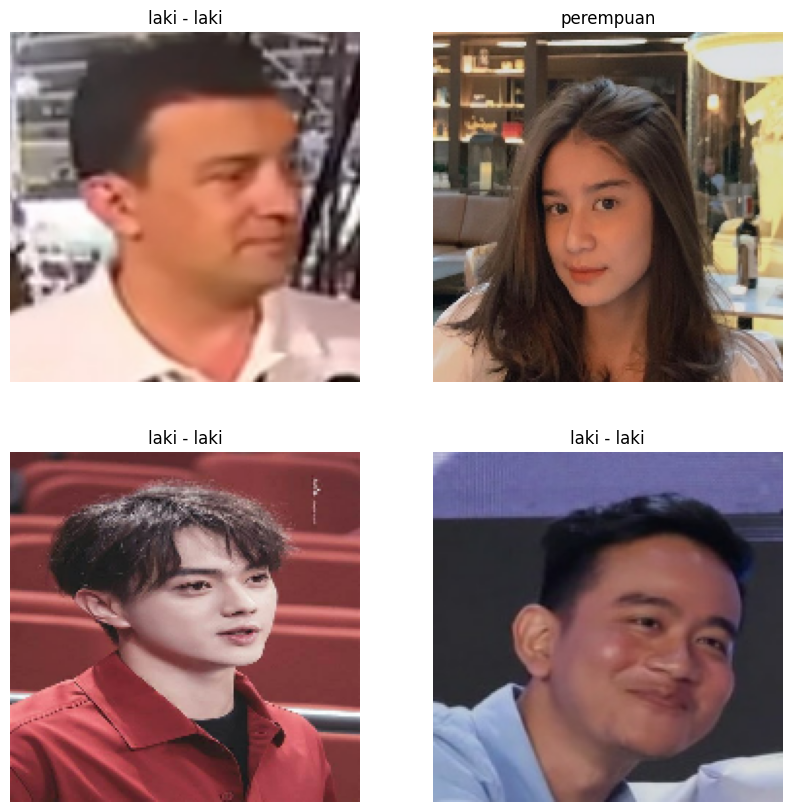

In [13]:
# lihat dataset training
import matplotlib.pyplot as plt
# ukuran gambar
plt.figure(figsize=(10, 10))
# penampilkan gambar berdasarkan class
for images, labels in train_ds.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1) # 2 baris, 2 kolom
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


# **Menampikan batct dari data train**

In [14]:
# 32 per batch, 180x180 pixel, warna 3 (RGB)
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


# **Meningkatkan efisiensi train**

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


# **Melakukan normalisasi dengan layer rescaling**

In [16]:
# normalisasi nilai RGB
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# nilai dari [0 sd 255] menjadi [0 sd 1]
print(np.min(first_image), np.max(first_image))


0.013698878 1.0


# **Membangun model**

In [17]:
# definisikan model
num_classes = len(class_names)
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


# **Menampilkan model**

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

# **Melakukan Kompilasi Model dengan optimasi adam**

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# **Melatih Model**

In [20]:

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/10
14/14 [==============================] - 40s 2s/step - loss: 0.9713 - accuracy: 0.5860 - val_loss: 0.6884 - val_accuracy: 0.5273
Epoch 2/10
14/14 [==============================] - 16s 1s/step - loss: 0.6849 - accuracy: 0.5679 - val_loss: 0.6801 - val_accuracy: 0.5545
Epoch 3/10
14/14 [==============================] - 16s 1s/step - loss: 0.6514 - accuracy: 0.6244 - val_loss: 0.6367 - val_accuracy: 0.6455
Epoch 4/10
14/14 [==============================] - 16s 1s/step - loss: 0.5783 - accuracy: 0.6946 - val_loss: 0.5880 - val_accuracy: 0.7273
Epoch 5/10
14/14 [==============================] - 16s 1s/step - loss: 0.4919 - accuracy: 0.7805 - val_loss: 0.5592 - val_accuracy: 0.7000
Epoch 6/10
14/14 [==============================] - 18s 1s/step - loss: 0.4138 - accuracy: 0.8348 - val_loss: 0.7996 - val_accuracy: 0.6091
Epoch 7/10
14/14 [==============================] - 17s 1s/step - loss: 0.3309 - accuracy: 0.8597 - val_loss: 0.6281 - val_accuracy: 0.6636
Epoch 8/10
14/14 [==

# **Menampilkan data accuracy dan loss**

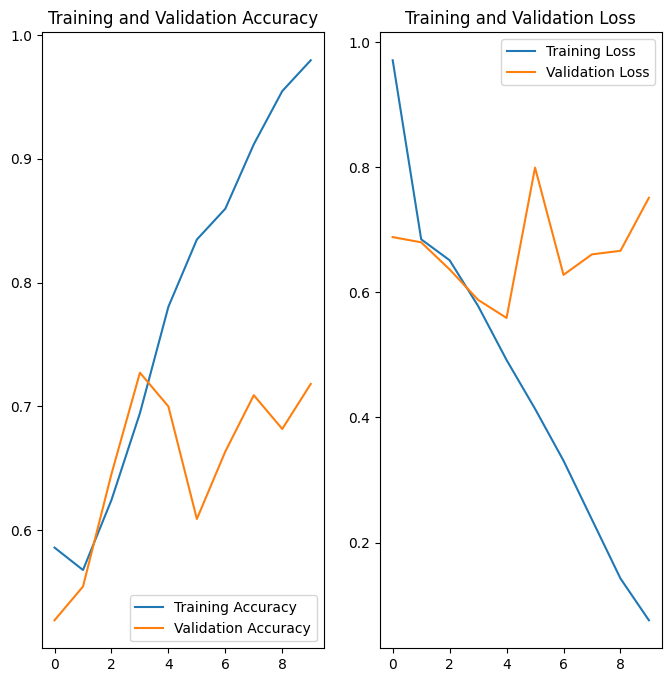

In [21]:
# plot
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# **Penaganan overfitting dalam model**

In [22]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)


# **Melakukan test secara visual**

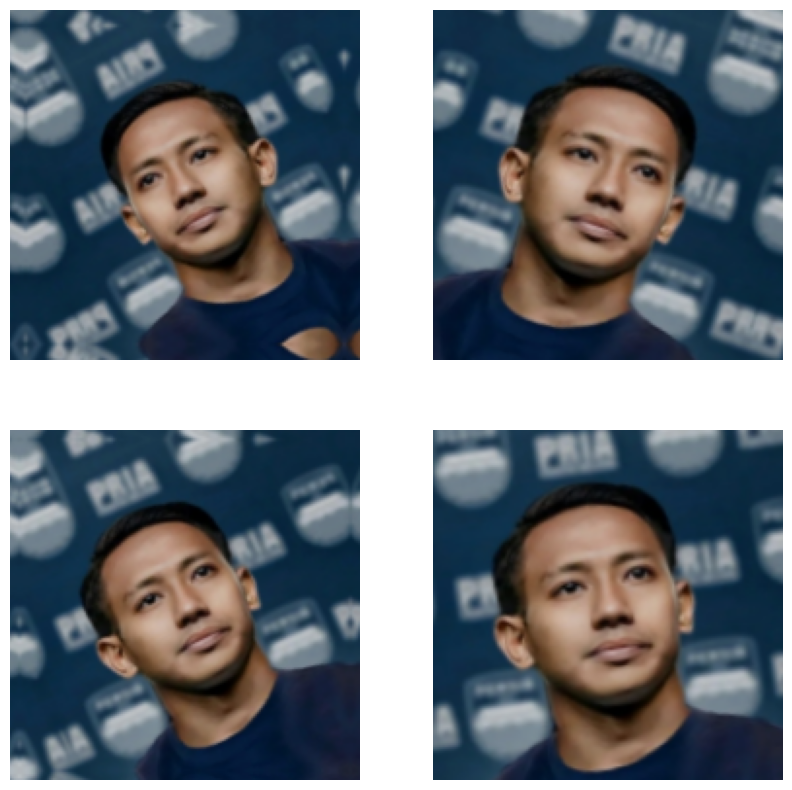

In [23]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(4):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


# **Membangun model**

In [24]:

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])


# **Menampilkan Model**

In [25]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

# **Melakukan Kompilasi Model dengan optimasi adam**

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# **Pelatihan MOdel**

In [27]:

epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/15
14/14 [==============================] - 21s 1s/step - loss: 0.8281 - accuracy: 0.5339 - val_loss: 0.6798 - val_accuracy: 0.5273
Epoch 2/15
14/14 [==============================] - 20s 1s/step - loss: 0.6892 - accuracy: 0.5566 - val_loss: 0.6715 - val_accuracy: 0.5273
Epoch 3/15
14/14 [==============================] - 19s 1s/step - loss: 0.6690 - accuracy: 0.5679 - val_loss: 0.6700 - val_accuracy: 0.5364
Epoch 4/15
14/14 [==============================] - 19s 1s/step - loss: 0.6331 - accuracy: 0.5747 - val_loss: 0.7161 - val_accuracy: 0.5545
Epoch 5/15
14/14 [==============================] - 20s 1s/step - loss: 0.6207 - accuracy: 0.6606 - val_loss: 0.6671 - val_accuracy: 0.6182
Epoch 6/15
14/14 [==============================] - 19s 1s/step - loss: 0.6314 - accuracy: 0.6538 - val_loss: 0.6030 - val_accuracy: 0.6818
Epoch 7/15
14/14 [==============================] - 19s 1s/step - loss: 0.6056 - accuracy: 0.6855 - val_loss: 0.6221 - val_accuracy: 0.6727
Epoch 8/15
14/14 [==

# **Menampilkan data accuracy dan loss**

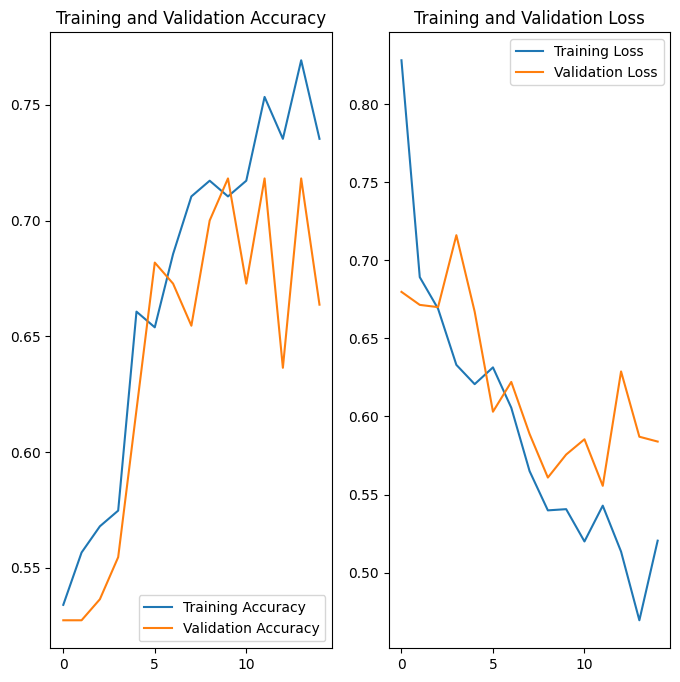

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# **Melakukan Prediksi**

Saving 4e31db70-ec41-4da9-8be6-a64921e294ac.jpeg to 4e31db70-ec41-4da9-8be6-a64921e294ac.jpeg
1/1 [==============================] - 0s 139ms/step
Pada gambar di bawah termasuk katagori perempuan dengan kemiripan 86.18%.


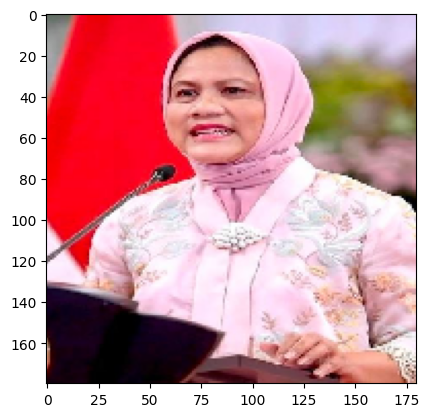

In [29]:
from google.colab import files                                                                                            #Mengimpor modul import file

uploaded = files.upload()
for fn in uploaded.keys():

  temp_name = fn
  img = tf.keras.utils.load_img(
      temp_name, target_size=(img_height, img_width)
  )
  plt.imshow(img)
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print(
      "Pada gambar di bawah termasuk katagori {} dengan kemiripan {:.2f}%."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
  )